# Lending Club Loan Defualt Analysis

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset into a dataframe

In [2]:
# Reading loan.csv file into a dataframe
# Setting low_memory=False to load columns with multiple datatypes
original_dataset = pd.read_csv('loan.csv', low_memory=False)

In [3]:
loan = original_dataset.copy()

In [4]:
# Setting float format to .2 percision
pd.options.display.float_format = '{:.2f}'.format

# Increasing the max number of columns that can be displayed in pandas
pd.set_option('display.max_columns', 111)

In [5]:
print(loan.shape)
loan.head()

(39717, 111)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   
3  1076863    1277178      10000        10000         10000.00   36 months   
4  1075358    1311748       3000         3000          3000.00   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT    24000.00            Verified  Dec-11   Fully Paid   
1           RENT    30000.00     Source Verified  Dec-11  Charged Off   
2           RENT    12252.00        Not Verified  Dec-11   Fully Paid   
3           RENT    49200.00     Source Verified  Dec-11   Fully Paid   
4           RENT    80000.00     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state   dti  delinq_2yrs  \
0              Computer    860xx         AZ 27.65            0   
1                  bike    309xx         GA  1.00            0   
2  real estate business    606xx         IL  8.72            0   
3              personel    917xx         CA 20.00            0   
4              Personal    972xx         OR 17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                   35.00   
4           Jan-96               0                   38.00   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f       0.00           0.00      5863.16          5833.84   
1                   f       0.00           0.00      1008.71          1008.71   
2                   f       0.00           0.00      3005.67          3005.67   
3                   f       0.00           0.00     12231.89         12231.89   
4                   f     524.06         524.06      3513.33          3513.33   

   total_rec_prncp  total_rec_int  tota

# Data Cleaning

#### Checking the percentage of null values in the dataset

In [6]:
# As we'll check the null percentage in the dataframe multiple times, creating a fundtion to do the same
def null_percentage(df):
    """
    Returns a series which contains the percentage of null values in the dataframe
    """
    return round(100 * (df.isnull().sum() / len(df.index)), 2)

#### Dropping the columns with more than 30% of null values

In [7]:
# Creating a series that contains the percentage of null values
null_p = null_percentage(loan)

# Printing columns that have more than 30% of null values
print(null_p[null_p > 30])

# Creating a list that containes the column names of columns containing more than 30% null values
null_list = list(null_p[null_p > 30].index)

desc                              32.58
mths_since_last_delinq            64.66
mths_since_last_record            92.99
next_pymnt_d                      97.13
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00
open_rv_24m                      100.00
max_bal_bc                       100.00
all_util                         100.00
total_rev_hi_lim                 100.00
inq_fi                           100.00
total_cu_tl                      100.00
inq_last_12m                     100.00


In [8]:
# Dropping the above columns
loan = loan.drop(null_list, axis=1)
loan.shape

(39717, 53)

#### From the data dictionary, the column loan_status is what we'll run most of our analysis against

In [9]:
# Checking the unique values in loan_status column
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

#### As the we have to determine the driving factors for default, we can drop records that contain loan_status as 'Current', as it indicates that the loan has been accepted

In [10]:
# Dropping records that have loan_status as 'Current' as they are not needed for the current analysis
loan = loan[~(loan['loan_status'] == 'Current')]
loan.shape

(38577, 53)

#### Checking the columns in the _loan_ dataframe that have a single unique value

In [11]:
# Creating a Series containg the count of unique values in the dataframe
unique_c = loan.nunique()

# Printing the names of the columns with only one unique value
print(unique_c[unique_c == 1])

# Creating a list that contains the column names of columns containing only one unique value
unique_one = list(unique_c[unique_c == 1].index)

pymnt_plan                    1
initial_list_status           1
out_prncp                     1
out_prncp_inv                 1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64


As these columns have a single unique value, they will not provide any help in the analysis process, as such these columns can be dropped.

In [12]:
# Dropping columns that have only one unique value
loan = loan.drop(unique_one, axis=1)
loan.shape

(38577, 42)

#### Checking the columns which have 'object' as their datatype

In [13]:
# Storing a list containing the column names in a seperate variable
object_columns = list(loan.select_dtypes(include=['object']).columns)

# Looking at the data present in the columns which have datatype set as object
loan[object_columns].head()

term int_rate grade sub_grade             emp_title emp_length  \
0   36 months   10.65%     B        B2                   NaN  10+ years   
1   60 months   15.27%     C        C4                 Ryder   < 1 year   
2   36 months   15.96%     C        C5                   NaN  10+ years   
3   36 months   13.49%     C        C1   AIR RESOURCES BOARD  10+ years   
5   36 months    7.90%     A        A4  Veolia Transportaton    3 years   

  home_ownership verification_status issue_d  loan_status  \
0           RENT            Verified  Dec-11   Fully Paid   
1           RENT     Source Verified  Dec-11  Charged Off   
2           RENT        Not Verified  Dec-11   Fully Paid   
3           RENT     Source Verified  Dec-11   Fully Paid   
5           RENT     Source Verified  Dec-11   Fully Paid   

                                                 url         purpose  \
0  https://lendingclub.com/browse/loanDetail.acti...     credit_card   
1  https://lendingclub.com/browse/loanDetail.acti...             car   
2  https://lendingclub.com/browse/loanDetail.acti...  small_business   
3  https://lendingclub.com/browse/loanDetail.acti...           other   
5  https://lendingclub.com/browse/loanDetail.acti...         wedding   

                                   title zip_code addr_state earliest_cr_line  \
0                               Computer    860xx         AZ           Jan-85   
1                                   bike    309xx         GA           Apr-99   
2                   real estate business    606xx         IL           Nov-01   
3                               personel    917xx         CA           Feb-96   
5  My wedding loan I promise to pay back    852xx         AZ           Nov-04   

  revol_util last_pymnt_d last_credit_pull_d  
0     83.70%       Jan-15             May-16  
1      9.40%       Apr-13             Sep-13  
2     98.50%       Jun-14             May-16  
3        21%       Jan-15             Apr-16  
5     28.30%       Jan-15             Jan-16

#### From the above output we can see:
- __int_rate__ and __revol_util__ are being treated as _strings_ because of the __'%'__ sign
- __issue_d__, __earliest_cr_line__, __last_pymnt_d__ and __last_credit_pull_d__ can be converted to datetime for better analysis

In [14]:
# Converting int_rate from object to float
loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float')
print(f"int_rate:\n{loan['int_rate'].head()}")

# Converting revol_util from object to float
loan['revol_util'] = loan['revol_util'].str.strip('%').astype('float')
print(f"\nrevol_util:\n{loan['revol_util'].head()}")

int_rate:
0   10.65
1   15.27
2   15.96
3   13.49
5    7.90
Name: int_rate, dtype: float64

revol_util:
0   83.70
1    9.40
2   98.50
3   21.00
5   28.30
Name: revol_util, dtype: float64


In [15]:
# Converting issue_d to datetime
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')
print(f"issue_d:\n{loan['issue_d'].head()}")

# Converting earliest_cr_line to datetime
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'], format='%b-%y')
print(f"\nearliest_cr_line:\n{loan['earliest_cr_line'].head()}")

# Converting last_pymnt_d to datetime
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'], format='%b-%y')
print(f"\nlast_pymnt_d:\n{loan['last_pymnt_d'].head()}")

# Converting last_credit_pull_d to datetime
loan['last_credit_pull_d'] = pd.to_datetime(loan['last_credit_pull_d'], format='%b-%y')
print(f"\nlast_credit_pull_d:\n{loan['last_credit_pull_d'].head()}")

issue_d:
0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]

earliest_cr_line:
0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
5   2004-11-01
Name: earliest_cr_line, dtype: datetime64[ns]

last_pymnt_d:
0   2015-01-01
1   2013-04-01
2   2014-06-01
3   2015-01-01
5   2015-01-01
Name: last_pymnt_d, dtype: datetime64[ns]

last_credit_pull_d:
0   2016-05-01
1   2013-09-01
2   2016-05-01
3   2016-04-01
5   2016-01-01
Name: last_credit_pull_d, dtype: datetime64[ns]


In [16]:
# Rechecking columns which have datatype as object
object_columns = list(loan.select_dtypes(include=['object']).columns)

# Looking at the data present in the columns which have datatype set as object
loan[object_columns].head()

term grade sub_grade             emp_title emp_length home_ownership  \
0   36 months     B        B2                   NaN  10+ years           RENT   
1   60 months     C        C4                 Ryder   < 1 year           RENT   
2   36 months     C        C5                   NaN  10+ years           RENT   
3   36 months     C        C1   AIR RESOURCES BOARD  10+ years           RENT   
5   36 months     A        A4  Veolia Transportaton    3 years           RENT   

  verification_status  loan_status  \
0            Verified   Fully Paid   
1     Source Verified  Charged Off   
2        Not Verified   Fully Paid   
3     Source Verified   Fully Paid   
5     Source Verified   Fully Paid   

                                                 url         purpose  \
0  https://lendingclub.com/browse/loanDetail.acti...     credit_card   
1  https://lendingclub.com/browse/loanDetail.acti...             car   
2  https://lendingclub.com/browse/loanDetail.acti...  small_business   
3  https://lendingclub.com/browse/loanDetail.acti...           other   
5  https://lendingclub.com/browse/loanDetail.acti...         wedding   

                                   title zip_code addr_state  
0                               Computer    860xx         AZ  
1                                   bike    309xx         GA  
2                   real estate business    606xx         IL  
3                               personel    917xx         CA  
5  My wedding loan I promise to pay back    852xx         AZ

In [17]:
# Checking the number of unique values in the columns which have datatype object
loan[object_columns].nunique().sort_values(ascending=False)

url                    38577
emp_title              28027
title                  19297
zip_code                 822
addr_state                50
sub_grade                 35
purpose                   14
emp_length                11
grade                      7
home_ownership             5
verification_status        3
term                       2
loan_status                2
dtype: int64

#### from the above output, it can be noted that:
- __'url'__, __'emp_title'__ and __'title'__ have a large number of unique text values and can consequently be dropped
- __'zip_code'__ is another variable with a large number of unique values, however since part of the zip_code is redacted, this column can also be dropped

In [18]:
# Dropping columns with dtype='object', which have a large number of unique values
loan = loan.drop(['url', 'emp_title', 'title', 'zip_code'], axis=1)
loan.shape

(38577, 38)

In [19]:
# Viewing the first '5' records in the loan dataframe
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   
3  1076863    1277178      10000        10000         10000.00   36 months   
5  1075269    1311441       5000         5000          5000.00   36 months   

   int_rate  installment grade sub_grade emp_length home_ownership  \
0     10.65       162.87     B        B2  10+ years           RENT   
1     15.27        59.83     C        C4   < 1 year           RENT   
2     15.96        84.33     C        C5  10+ years           RENT   
3     13.49       339.31     C        C1  10+ years           RENT   
5      7.90       156.46     A        A4    3 years           RENT   

   annual_inc verification_status    issue_d  loan_status         purpose  \
0    24000.00            Verified 2011-12-01   Fully Paid     credit_card   
1    30000.00     Source Verified 2011-12-01  Charged Off             car   
2    12252.00        Not Verified 2011-12-01   Fully Paid  small_business   
3    49200.00     Source Verified 2011-12-01   Fully Paid           other   
5    36000.00     Source Verified 2011-12-01   Fully Paid         wedding   

  addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         AZ 27.65            0       1985-01-01               1         3   
1         GA  1.00            0       1999-04-01               5         3   
2         IL  8.72            0       2001-11-01               2         2   
3         CA 20.00            0       1996-02-01               1        10   
5         AZ 11.20            0       2004-11-01               3         9   

   pub_rec  revol_bal  revol_util  total_acc  total_pymnt  total_pymnt_inv  \
0        0      13648       83.70          9      5863.16          5833.84   
1        0       1687        9.40          4      1008.71          1008.71   
2        0       2956       98.50         10      3005.67          3005.67   
3        0       5598       21.00         37     12231.89         12231.89   
5        0       7963       28.30         12      5632.21          5632.21   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                0.00        0.00   
1           456.46         435.17                0.00      117.08   
2          2400.00         605.67                0.00        0.00   
3         10000.00        2214.92               16.97        0.00   
5          5000.00         632.21                0.00        0.00   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                     0.00   2015-01-01           171.62         2016-05-01   
1                     1.11   2013-04-01           119.66         2013-09-01   
2                     0.00   2014-06-01           649.91         2016-05-01   
3                     0.00   2015-01-01           357.48         2016-04-01   
5                     0.00   2015-01-01           161.03         2016-01-01   

   pub_rec_bankruptcies  
0                  0.00  
1                  0.00  
2                  0.00  
3                  0.00  
5                  0.00

In [20]:
# Checking the information of the columns in the dataframe
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       38577 non-null  int64         
 1   member_id                38577 non-null  int64         
 2   loan_amnt                38577 non-null  int64         
 3   funded_amnt              38577 non-null  int64         
 4   funded_amnt_inv          38577 non-null  float64       
 5   term                     38577 non-null  object        
 6   int_rate                 38577 non-null  float64       
 7   installment              38577 non-null  float64       
 8   grade                    38577 non-null  object        
 9   sub_grade                38577 non-null  object        
 10  emp_length               37544 non-null  object        
 11  home_ownership           38577 non-null  object        
 12  annual_inc               38577 n

#### Of the available columns __'id'__ and __'member_id'__ hold no significance in the analytic process and can be dropped

In [21]:
# Dropping 'id' and 'member_id'
loan = loan.drop(['id', 'member_id'], axis=1)
loan.shape

(38577, 36)

In [22]:
loan.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000          4975.00   36 months     10.65       162.87   
1       2500         2500          2500.00   60 months     15.27        59.83   
2       2400         2400          2400.00   36 months     15.96        84.33   
3      10000        10000         10000.00   36 months     13.49       339.31   
5       5000         5000          5000.00   36 months      7.90       156.46   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B        B2  10+ years           RENT    24000.00            Verified   
1     C        C4   < 1 year           RENT    30000.00     Source Verified   
2     C        C5  10+ years           RENT    12252.00        Not Verified   
3     C        C1  10+ years           RENT    49200.00     Source Verified   
5     A        A4    3 years           RENT    36000.00     Source Verified   

     issue_d  loan_status         purpose addr_state   dti  delinq_2yrs  \
0 2011-12-01   Fully Paid     credit_card         AZ 27.65            0   
1 2011-12-01  Charged Off             car         GA  1.00            0   
2 2011-12-01   Fully Paid  small_business         IL  8.72            0   
3 2011-12-01   Fully Paid           other         CA 20.00            0   
5 2011-12-01   Fully Paid         wedding         AZ 11.20            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
0       1985-01-01               1         3        0      13648       83.70   
1       1999-04-01               5         3        0       1687        9.40   
2       2001-11-01               2         2        0       2956       98.50   
3       1996-02-01               1        10        0       5598       21.00   
5       2004-11-01               3         9        0       7963       28.30   

   total_acc  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0          9      5863.16          5833.84          5000.00         863.16   
1          4      1008.71          1008.71           456.46         435.17   
2         10      3005.67          3005.67          2400.00         605.67   
3         37     12231.89         12231.89         10000.00        2214.92   
5         12      5632.21          5632.21          5000.00         632.21   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00        0.00                     0.00   2015-01-01   
1                0.00      117.08                     1.11   2013-04-01   
2                0.00        0.00                     0.00   2014-06-01   
3               16.97        0.00                     0.00   2015-01-01   
5                0.00        0.00                     0.00   2015-01-01   

   last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  
0           171.62         2016-05-01                  0.00  
1           119.66         2013-09-01                  0.00  
2           649.91         2016-05-01                  0.00  
3           357.48         2016-04-01                  0.00  
5           161.03         2016-01-01                  0.00

In [23]:
# Rechecking the percentage of null values present in the dataframe
null_p = null_percentage(loan)
null_p[null_p != 0]

emp_length             2.68
revol_util             0.13
last_pymnt_d           0.18
last_credit_pull_d     0.01
pub_rec_bankruptcies   1.81
dtype: float64

#### While we could impute the missing value in emp_length with the mode, all the records that contain null values are beeing dropped to avoid introducing a bias.

In [24]:
# Droping the records that contain null values
loan = loan.dropna(subset=list(null_p[null_p != 0].index))
loan.shape

(36737, 36)

#### Checking the percentage of records retained after deletion of records with null values

In [25]:
# Percentage of records retained
round(100 * (loan.shape[0] / original_dataset.shape[0]), 2)

92.5

In [26]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36737 entries, 0 to 39680
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                36737 non-null  int64         
 1   funded_amnt              36737 non-null  int64         
 2   funded_amnt_inv          36737 non-null  float64       
 3   term                     36737 non-null  object        
 4   int_rate                 36737 non-null  float64       
 5   installment              36737 non-null  float64       
 6   grade                    36737 non-null  object        
 7   sub_grade                36737 non-null  object        
 8   emp_length               36737 non-null  object        
 9   home_ownership           36737 non-null  object        
 10  annual_inc               36737 non-null  float64       
 11  verification_status      36737 non-null  object        
 12  issue_d                  36737 n

#### Checking for correlation between loan_amnt, funded_amnt, funded_amnt_inv

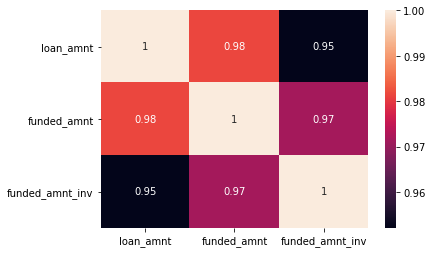

In [27]:
correlation = loan[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].corr()
sns.heatmap(correlation, annot=True)
plt.yticks(rotation=360)
plt.show()

#### From the above heatmap we can observe that there is a high correlation between the three variables, as such we can keep one of these variables and drop the rest to avoid multicollinearity

- We'll keep the loan_amnt variable as it is the amount that the applicant want's

In [28]:
# Dropping funded_amnt and funded_amnt_inv
loan = loan.drop(['funded_amnt', 'funded_amnt_inv'], axis=1)
loan.shape

(36737, 34)

In [29]:
loan.head()

loan_amnt        term  int_rate  installment grade sub_grade emp_length  \
0       5000   36 months     10.65       162.87     B        B2  10+ years   
1       2500   60 months     15.27        59.83     C        C4   < 1 year   
2       2400   36 months     15.96        84.33     C        C5  10+ years   
3      10000   36 months     13.49       339.31     C        C1  10+ years   
5       5000   36 months      7.90       156.46     A        A4    3 years   

  home_ownership  annual_inc verification_status    issue_d  loan_status  \
0           RENT    24000.00            Verified 2011-12-01   Fully Paid   
1           RENT    30000.00     Source Verified 2011-12-01  Charged Off   
2           RENT    12252.00        Not Verified 2011-12-01   Fully Paid   
3           RENT    49200.00     Source Verified 2011-12-01   Fully Paid   
5           RENT    36000.00     Source Verified 2011-12-01   Fully Paid   

          purpose addr_state   dti  delinq_2yrs earliest_cr_line  \
0     credit_card         AZ 27.65            0       1985-01-01   
1             car         GA  1.00            0       1999-04-01   
2  small_business         IL  8.72            0       2001-11-01   
3           other         CA 20.00            0       1996-02-01   
5         wedding         AZ 11.20            0       2004-11-01   

   inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0               1         3        0      13648       83.70          9   
1               5         3        0       1687        9.40          4   
2               2         2        0       2956       98.50         10   
3               1        10        0       5598       21.00         37   
5               3         9        0       7963       28.30         12   

   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0      5863.16          5833.84          5000.00         863.16   
1      1008.71          1008.71           456.46         435.17   
2      3005.67          3005.67          2400.00         605.67   
3     12231.89         12231.89         10000.00        2214.92   
5      5632.21          5632.21          5000.00         632.21   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00        0.00                     0.00   2015-01-01   
1                0.00      117.08                     1.11   2013-04-01   
2                0.00        0.00                     0.00   2014-06-01   
3               16.97        0.00                     0.00   2015-01-01   
5                0.00        0.00                     0.00   2015-01-01   

   last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  
0           171.62         2016-05-01                  0.00  
1           119.66         2013-09-01                  0.00  
2           649.91         2016-05-01                  0.00  
3           357.48         2016-04-01                  0.00  
5           161.03         2016-01-01                  0.00

#### Creating Derived Columns
- Splitting the datetime columns into two columns namely month and year

In [30]:
# Columns with datatype as 'datetime'
list(loan.select_dtypes(include=['datetime64[ns]']).columns)

['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

##### 1. Splitting issue_d into issue_d_month and issue_d_year

In [31]:
# 1. issue_d -> issue_d_month and issue_d_year
loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year

In [32]:
# Checking the unique values in issue_d_month and issue_d_year
print(f"issue_d_month: {sorted(list(loan['issue_d_month'].unique()))}")
print(f"issue_d_year: {sorted(list(loan['issue_d_year'].unique()))}")

issue_d_month: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
issue_d_year: [2007, 2008, 2009, 2010, 2011]


##### 2. Splitting earliest_cr_line into earliest_cr_line_month and earliest_cr_line_year

In [33]:
# 2. earliest_cr_line -> earliest_cr_line_month and earliest_cr_line_year
loan['earliest_cr_line_month'] = loan['earliest_cr_line'].dt.month
loan['earliest_cr_line_year'] = loan['earliest_cr_line'].dt.year

In [34]:
# Checking the unique values in earliest_cr_line_month and earliest_cr_line_year
print(f"earliest_cr_line_month: {sorted(list(loan['earliest_cr_line_month'].unique()))}")
print(f"earliest_cr_line_year: {sorted(list(loan['earliest_cr_line_year'].unique()))}")

earliest_cr_line_month: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
earliest_cr_line_year: [1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2046, 2050, 2054, 2056, 2062, 2063, 2064, 2065, 2066, 2067, 2068]


In __earliest_cr_line_year__, we can see that the years before __'1969'__ which should have been in the __20th century__ have ended up as years in the __21st century__.<br />
An example of this would be the years __'2046', '2050', ..., '2068'__

__Subtracting ***100*** from these years to get the proper year value__

In [35]:
# Subtracting 100 from these values to get the proper year
loan['earliest_cr_line_year'] = loan['earliest_cr_line_year'].apply(lambda x: x if x <= 2008 else (x - 100))
print(f"earliest_cr_line_year: {sorted(list(loan['earliest_cr_line_year'].unique()))}")

earliest_cr_line_year: [1946, 1950, 1954, 1956, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008]


##### 3. Splitting last_pymnt_d into last_pymnt_d_month and last_pymnt_d_year

In [36]:
# 3. last_pymnt_d -> last_pymnt_d_month and last_pymnt_d_year
loan['last_pymnt_d_month'] = loan['last_pymnt_d'].dt.month
loan['last_pymnt_d_year'] = loan['last_pymnt_d'].dt.year

In [37]:
# Checking the unique values in last_pymnt_d_month and last_pymnt_d_year
print(f"last_pymnt_d_month: {sorted(list(loan['last_pymnt_d_month'].unique()))}")
print(f"last_pymnt_d_year: {sorted(list(loan['last_pymnt_d_year'].unique()))}")

last_pymnt_d_month: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
last_pymnt_d_year: [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


##### 4. Splitting last_credit_pull_d into last_credit_pull_d_month and last_credit_pull_d_year

In [38]:
# 4. last_credit_pull_d -> last_credit_pull_d_month and last_credit_pull_d_year
loan['last_credit_pull_d_month'] = loan['last_credit_pull_d'].dt.month
loan['last_credit_pull_d_year'] = loan['last_credit_pull_d'].dt.year

In [39]:
# Checking the unique values in last_credit_pull_d_month and last_credit_pull_d_year
print(f"last_credit_pull_d_month: {sorted(list(loan['last_credit_pull_d_month'].unique()))}")
print(f"last_credit_pull_d_year: {sorted(list(loan['last_credit_pull_d_year'].unique()))}")

last_credit_pull_d_month: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
last_credit_pull_d_year: [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


In [40]:
# Dropping issue_d, earliest_cr_line, last_pymnt_d column and last_credit_pull_d as they are now redundant
loan = loan.drop(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'], axis=1)
print(loan.shape)
loan.head()

(36737, 38)


loan_amnt        term  int_rate  installment grade sub_grade emp_length  \
0       5000   36 months     10.65       162.87     B        B2  10+ years   
1       2500   60 months     15.27        59.83     C        C4   < 1 year   
2       2400   36 months     15.96        84.33     C        C5  10+ years   
3      10000   36 months     13.49       339.31     C        C1  10+ years   
5       5000   36 months      7.90       156.46     A        A4    3 years   

  home_ownership  annual_inc verification_status  loan_status         purpose  \
0           RENT    24000.00            Verified   Fully Paid     credit_card   
1           RENT    30000.00     Source Verified  Charged Off             car   
2           RENT    12252.00        Not Verified   Fully Paid  small_business   
3           RENT    49200.00     Source Verified   Fully Paid           other   
5           RENT    36000.00     Source Verified   Fully Paid         wedding   

  addr_state   dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0         AZ 27.65            0               1         3        0      13648   
1         GA  1.00            0               5         3        0       1687   
2         IL  8.72            0               2         2        0       2956   
3         CA 20.00            0               1        10        0       5598   
5         AZ 11.20            0               3         9        0       7963   

   revol_util  total_acc  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       83.70          9      5863.16          5833.84          5000.00   
1        9.40          4      1008.71          1008.71           456.46   
2       98.50         10      3005.67          3005.67          2400.00   
3       21.00         37     12231.89         12231.89         10000.00   
5       28.30         12      5632.21          5632.21          5000.00   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
5         632.21                0.00        0.00                     0.00   

   last_pymnt_amnt  pub_rec_bankruptcies  issue_d_month  issue_d_year  \
0           171.62                  0.00             12          2011   
1           119.66                  0.00             12          2011   
2           649.91                  0.00             12          2011   
3           357.48                  0.00             12          2011   
5           161.03                  0.00             12          2011   

   earliest_cr_line_month  earliest_cr_line_year  last_pymnt_d_month  \
0                       1                   1985                   1   
1                       4                   1999                   4   
2                      11                   2001                   6   
3                       2                   1996                   1   
5                      11                   2004                   1   

   last_pymnt_d_year  last_credit_pull_d_month  last_credit_pull_d_year  
0               2015                         5                     2016  
1               2013                         9                     2013  
2               2014                         5                     2016  
3               2015                         4                     2016  
5               2015                         1                     2016

#### Creating a new column loan_status_numeric for ease of plotting

In [41]:
# 'Charged Off' = 1 and 'Fully Paid' = 0
loan['loan_status_numeric'] = loan['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
print(loan.shape)
loan.head()

(36737, 39)


loan_amnt        term  int_rate  installment grade sub_grade emp_length  \
0       5000   36 months     10.65       162.87     B        B2  10+ years   
1       2500   60 months     15.27        59.83     C        C4   < 1 year   
2       2400   36 months     15.96        84.33     C        C5  10+ years   
3      10000   36 months     13.49       339.31     C        C1  10+ years   
5       5000   36 months      7.90       156.46     A        A4    3 years   

  home_ownership  annual_inc verification_status  loan_status         purpose  \
0           RENT    24000.00            Verified   Fully Paid     credit_card   
1           RENT    30000.00     Source Verified  Charged Off             car   
2           RENT    12252.00        Not Verified   Fully Paid  small_business   
3           RENT    49200.00     Source Verified   Fully Paid           other   
5           RENT    36000.00     Source Verified   Fully Paid         wedding   

  addr_state   dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0         AZ 27.65            0               1         3        0      13648   
1         GA  1.00            0               5         3        0       1687   
2         IL  8.72            0               2         2        0       2956   
3         CA 20.00            0               1        10        0       5598   
5         AZ 11.20            0               3         9        0       7963   

   revol_util  total_acc  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       83.70          9      5863.16          5833.84          5000.00   
1        9.40          4      1008.71          1008.71           456.46   
2       98.50         10      3005.67          3005.67          2400.00   
3       21.00         37     12231.89         12231.89         10000.00   
5       28.30         12      5632.21          5632.21          5000.00   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
5         632.21                0.00        0.00                     0.00   

   last_pymnt_amnt  pub_rec_bankruptcies  issue_d_month  issue_d_year  \
0           171.62                  0.00             12          2011   
1           119.66                  0.00             12          2011   
2           649.91                  0.00             12          2011   
3           357.48                  0.00             12          2011   
5           161.03                  0.00             12          2011   

   earliest_cr_line_month  earliest_cr_line_year  last_pymnt_d_month  \
0                       1                   1985                   1   
1                       4                   1999                   4   
2                      11                   2001                   6   
3                       2                   1996                   1   
5                      11                   2004                   1   

   last_pymnt_d_year  last_credit_pull_d_month  last_credit_pull_d_year  \
0               2015                         5                     2016   
1               2013                         9                     2013   
2               2014                         5                     2016   
3               2015                         4                     2016   
5               2015                         1                     2016   

   loan_status_numeric  
0                    0  
1                    1  
2                    0  
3                    0  
5                    0

# Data Analysis

## Univariate and Segmented Univariate Analysis

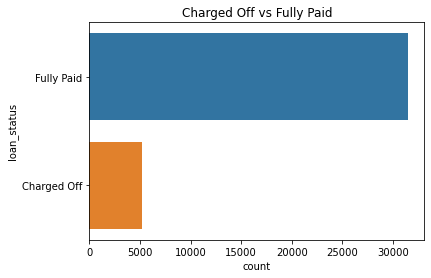

In [42]:
# Plotting a count plot for the target variable loan_status
plt.title("Charged Off vs Fully Paid")
sns.countplot(y='loan_status', data=loan)
plt.show()

- Checking the overall percentage of loans that have defaulted

In [43]:
# Overall percentage of default loans
round(100 * np.mean(loan.loan_status_numeric), 2)

14.16

In [44]:
data = [int(loan.loan_status_numeric.sum()), int((len(loan.index) - loan.loan_status_numeric.sum()))]
labels = ['Charged Off', 'Fully Paid']
explode = (0, 0.1)

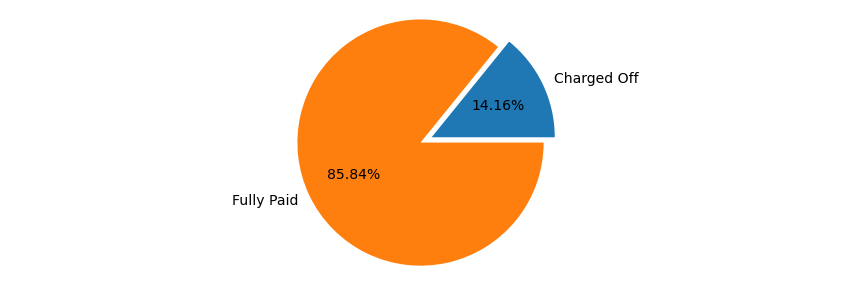

In [45]:
plt.figure(figsize=(15, 5))
plt.pie(data, labels=labels, explode=explode, autopct='%.2f%%', textprops={'fontsize': 14})
plt.axis('equal')
plt.show()

#### There are approximately 14.16% loans in the dataset which have defaulted

### Plotting graphs for the available variables

#### 1. loan_amnt
_*Description*_: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

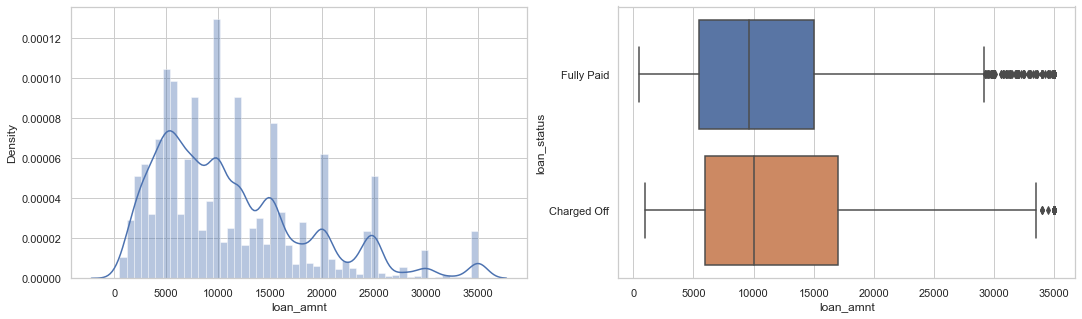

In [46]:
plt.figure(figsize=(18, 5))
sns.set_theme(style= 'whitegrid')
plt.subplot(1, 2, 1)
sns.distplot(loan['loan_amnt'])
plt.subplot(1, 2, 2)
sns.boxplot(data=loan, x='loan_amnt', y='loan_status')
plt.show()

In [47]:
loan.groupby('loan_status')['loan_amnt'].describe()

count     mean     std     min     25%      50%      75%  \
loan_status                                                               
Charged Off  5203.00 12296.29 8096.92 1000.00 6000.00 10000.00 17000.00   
Fully Paid  31534.00 10964.77 7223.86  500.00 5500.00  9600.00 15000.00   

                 max  
loan_status           
Charged Off 35000.00  
Fully Paid  35000.00

#### Creating a loan_amnt_bin variable
Setting the bin size as __5000__ as there is a spike in the graph at every 5000 interval

In [48]:
loan['loan_amnt_bin'] = pd.cut(loan['loan_amnt'], 
                               [x for x in range(0, 36000, 5000)], labels=[f'{x}-{x+5}k' for x in range(0, 35, 5)])

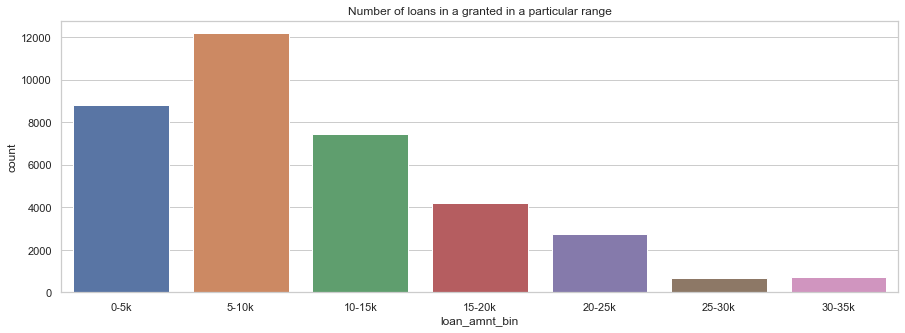

In [49]:
plt.figure(figsize=(15, 5))
sns.countplot(x='loan_amnt_bin', data=loan)
plt.title('Number of loans in a granted in a particular range')
plt.show()

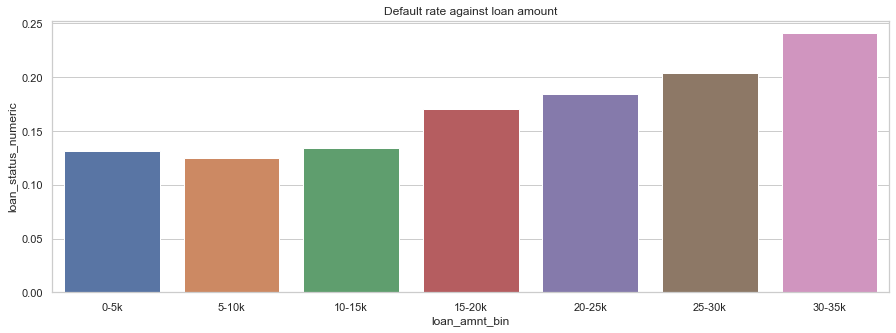

In [50]:
plt.figure(figsize=(15, 5))
sns.barplot(x='loan_amnt_bin', y='loan_status_numeric', data=loan, ci=None)
plt.title('Default rate against loan amount')
plt.show()

- __From the graph plotted above, we can see a clear rise in the default rate for loans starting from 15,000 and higher__
- __Thus as the loan_amnt increases the risk of default also increase.__

#### 2. Term
_Description_: The number of payments on the loan. Values are in months and can be either 36 or 60.

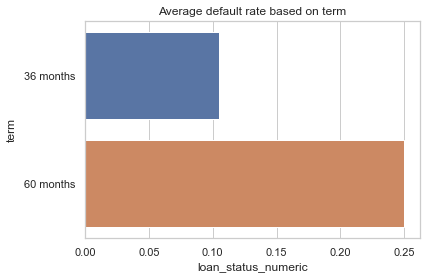

In [51]:
sns.barplot(x='loan_status_numeric', y='term', data=loan, ci=None)
plt.title('Average default rate based on term')
plt.show()

- __Loans given for a period of 60 months have a higher chance of default__

#### 3. Grade
_Description_: LC assigned loan grade

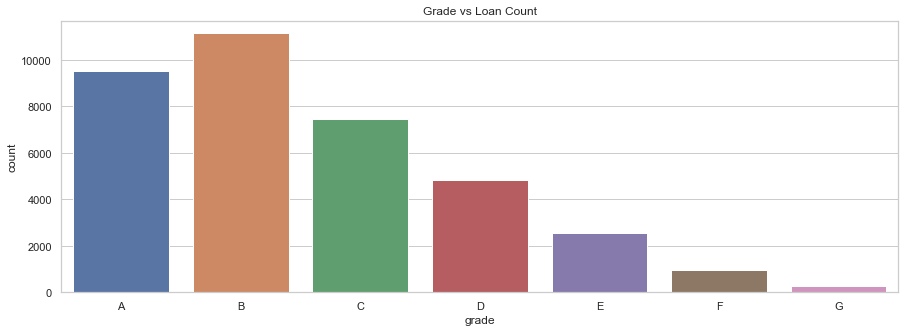

In [52]:
# Count of loans given for each grade
plt.figure(figsize=(15, 5))
sns.countplot(x='grade', data=loan, order=sorted(list(loan['grade'].unique())))
plt.title('Grade vs Loan Count')
plt.show()

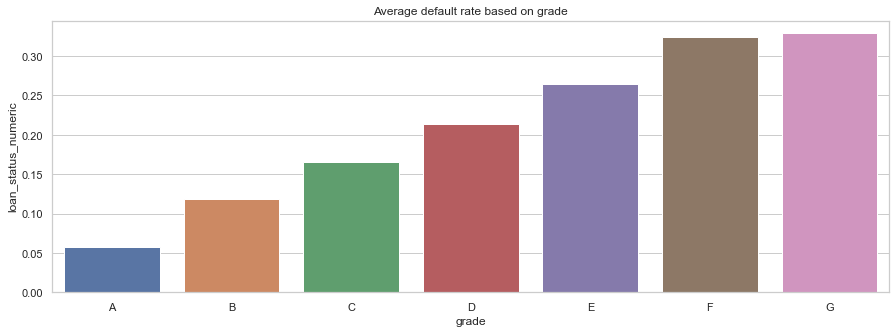

In [53]:
plt.figure(figsize=(15, 5))
sns.barplot(x='grade', y='loan_status_numeric', data=loan, ci=None, order=sorted(list(loan.grade.unique())))
plt.title('Average default rate based on grade')
plt.show()

- __As the grade of the loan deteriorates, the risk of default increses__

#### 4. sub_grade
_Description_: LC assigned loan subgrade

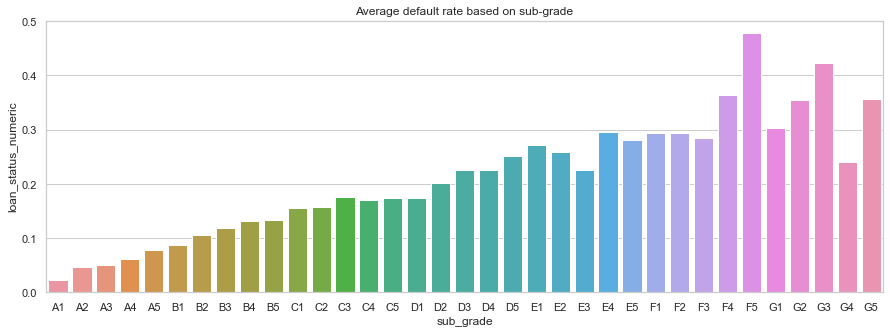

In [54]:
plt.figure(figsize=(15, 5))
sns.barplot(x='sub_grade', y='loan_status_numeric', data=loan, ci=None, order=sorted(list(loan.sub_grade.unique())))
plt.title('Average default rate based on sub-grade')
plt.show()

- __Similar to the grade variable, the rate of default goes up as the sub-grade of the loan goes down.__

#### 5. emp_length
_Description_: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

#### Creating a emp_length_numeric variable for ease of plotting

In [55]:
# Creating a dictionary that maps the text to a numerical value
keys = tuple(sorted(list(loan['emp_length'].unique())))
keys

('1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year')

In [56]:
values = (1, 10, 2, 3, 4, 5, 6, 7, 8, 9, 0)
values

(1, 10, 2, 3, 4, 5, 6, 7, 8, 9, 0)

In [57]:
_dict = {}
for key, value in zip(keys, values):
    _dict[key] = value
_dict

{'1 year': 1,
 '10+ years': 10,
 '2 years': 2,
 '3 years': 3,
 '4 years': 4,
 '5 years': 5,
 '6 years': 6,
 '7 years': 7,
 '8 years': 8,
 '9 years': 9,
 '< 1 year': 0}

In [58]:
loan['emp_length_numeric'] = loan['emp_length'].apply(lambda x: _dict[x])

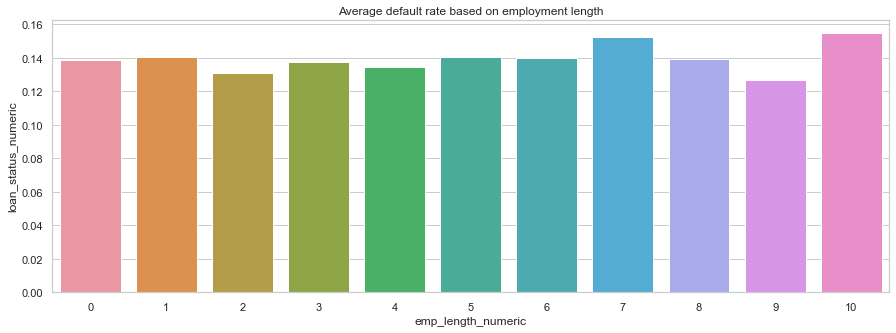

In [59]:
plt.figure(figsize=(15, 5))
sns.barplot(x='emp_length_numeric', y='loan_status_numeric', data=loan, ci=None)
plt.title('Average default rate based on employment length')
plt.show()

- __emp_length has an almost negligible impact on the chance of default__

#### 6. home_ownership
_Description_: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

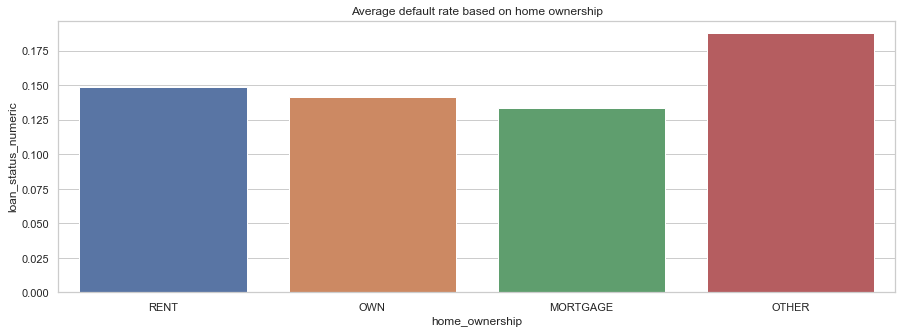

In [60]:
plt.figure(figsize=(15, 5))
sns.barplot(x='home_ownership', y='loan_status_numeric', data=loan, ci=None)
plt.title('Average default rate based on home ownership')
plt.show()

- __From the graph the variable home_ownership, does not seem to impact the chance of default significantly__

#### 7. annaul_inc
_Description_: The self-reported annual income provided by the borrower during registration.

In [61]:
loan['annual_inc'].describe(percentiles=[.01, .05, .25, .50, .75, .80, .90, .95, .99])

count     36737.00
mean      69467.23
std       64062.56
min        4000.00
1%        15000.00
5%        24000.00
25%       41200.00
50%       60000.00
75%       83000.00
80%       90000.00
90%      117000.00
95%      142000.00
99%      235000.00
max     6000000.00
Name: annual_inc, dtype: float64

In [62]:
loan[~(loan['annual_inc'] > 235000)]['annual_inc'].describe()

count    36376.00
mean     66064.91
std      35195.24
min       4000.00
25%      41000.00
50%      59266.00
75%      82000.00
max     235000.00
Name: annual_inc, dtype: float64

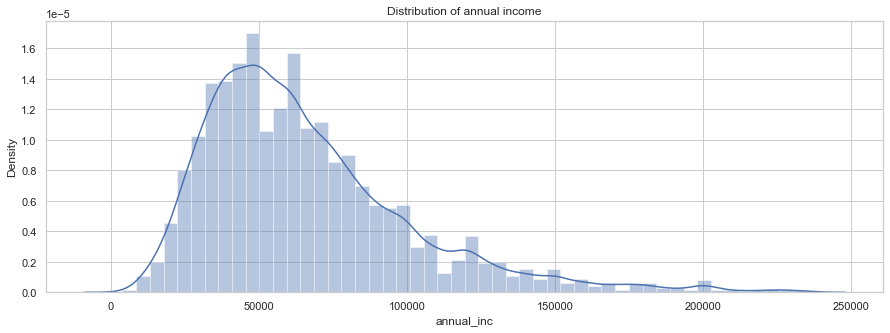

In [63]:
plt.figure(figsize=(15, 5))
sns.distplot(loan[~(loan['annual_inc'] > 235000)]['annual_inc'])
plt.title('Distribution of annual income')
plt.show()

#### Using the quantiles to create bins for low, medium, high and very high

In [64]:
# Using the 25th, 50th and 77th percentile
quant_25, quant_50, quant_77 = np.quantile(loan['annual_inc'], (0.25, 0.5, 0.77))

In [65]:
def annual_inc_b(x):
    if x < quant_25:
        return 'low'
    elif quant_25 <= x < quant_50:
        return 'medium'
    elif quant_50 <= x < quant_77:
        return 'high'
    else:
        return 'very high'

In [66]:
loan['annual_inc_bin'] = loan['annual_inc'].apply(lambda x: annual_inc_b(x))

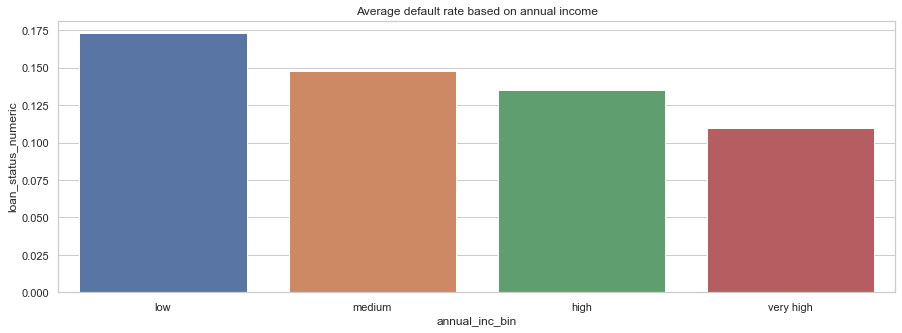

In [67]:
plt.figure(figsize=(15, 5))
sns.barplot(x='annual_inc_bin', y='loan_status_numeric', data=loan, ci=None)
plt.title('Average default rate based on annual income')
plt.show()

- __Loan defaults are high for low income__
- __As the income goes up the chances of default progressively get smaller__

#### 8. verification_status
_Description_: Indicates if income was verified by LC, not verified, or if the income source was verified

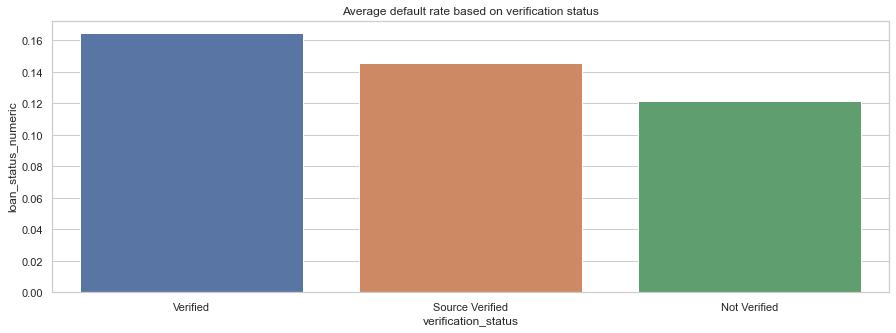

In [68]:
plt.figure(figsize=(15, 5))
sns.barplot(x='verification_status', y='loan_status_numeric', data=loan, ci=None)
plt.title('Average default rate based on verification status')
plt.show()

- __Verfied loans have a higher chance of being Charged Off as compared to the loans which are Not Verified__

#### 9. purpose
_Description_: A category provided by the borrower for the loan request.

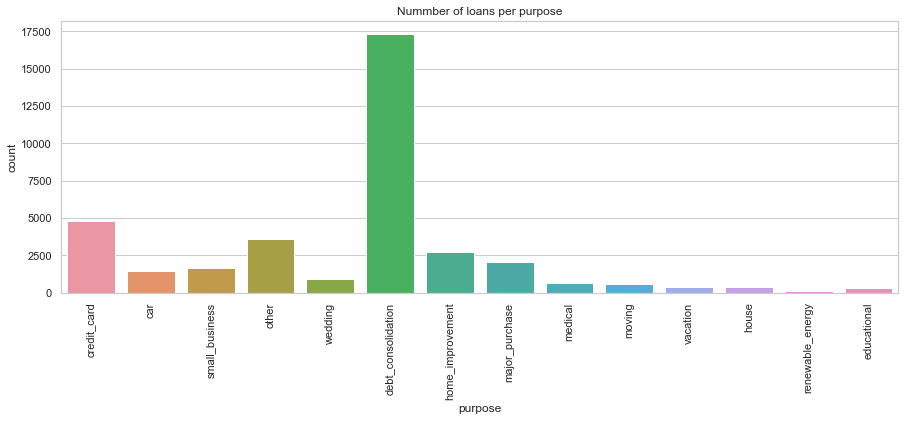

In [69]:
# Plotting the number of loans taken for each purpose
plt.figure(figsize=(15, 5))
sns.countplot(x='purpose', data=loan)
plt.title('Nummber of loans per purpose')
plt.xticks(rotation=90)
plt.show()

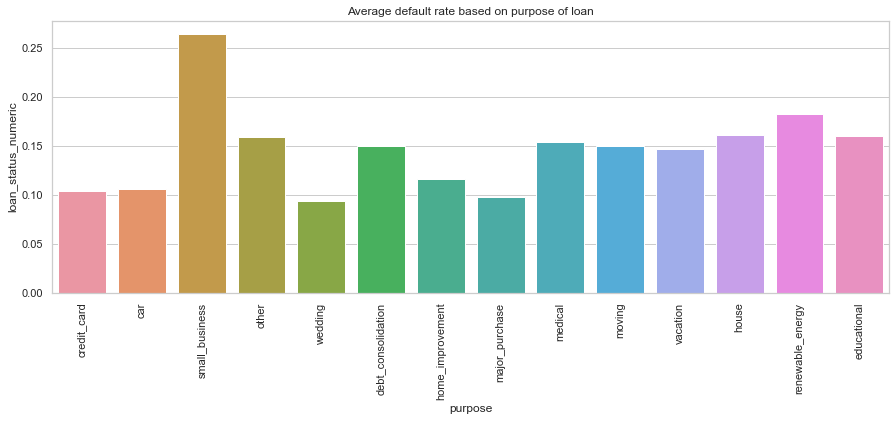

In [70]:
plt.figure(figsize=(15, 5))
sns.barplot(x='purpose', y='loan_status_numeric', data=loan, ci=None)
plt.title('Average default rate based on purpose of loan')
plt.xticks(rotation=90)
plt.show()

- __Most of the loans taken are for debt consolidation__
- __Loans taken for the purpose of 'small_buisness' are most likely to default__
- __'renewable_energy' is the second most purpose which is likely to default__

#### 10. issue_d_month
_Description_: The month which loan was funded

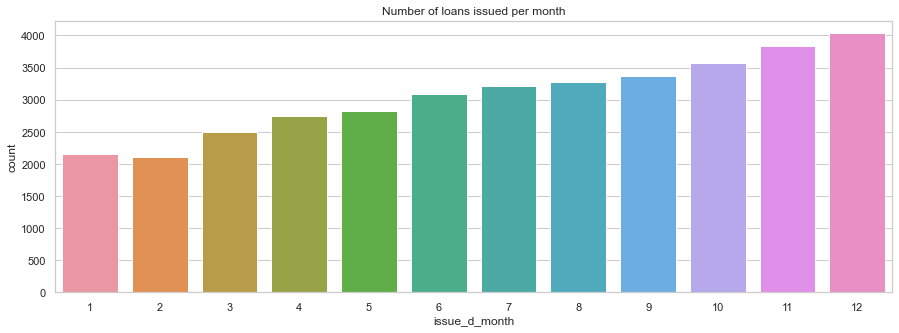

In [71]:
# Plotting the number of loans taken on the basis of month
plt.figure(figsize=(15, 5))
sns.countplot(x='issue_d_month', data=loan)
plt.title('Number of loans issued per month')
plt.show()

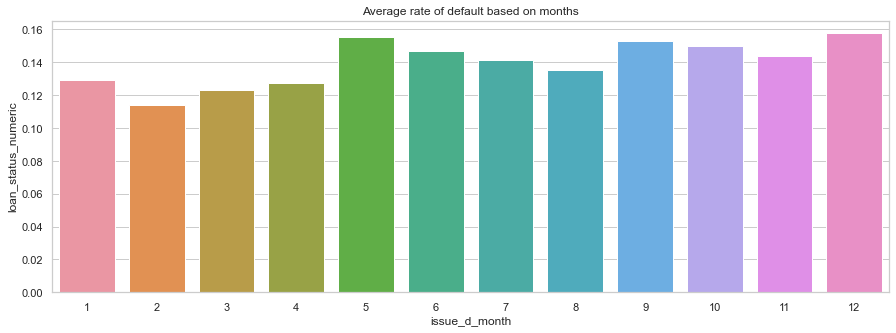

In [72]:
# Plotting the average default rate across the months
plt.figure(figsize=(15, 5))
sns.barplot(x='issue_d_month', y='loan_status_numeric', data=loan, ci=None)
plt.title('Average rate of default based on months')
plt.show()

- __Most loans are granted in December or rather in the later half of the year__
- __The default rate does not seem to be haveily affected by any single month__

#### 11. issue_d_year
_Description_: The year in which the loan was funded

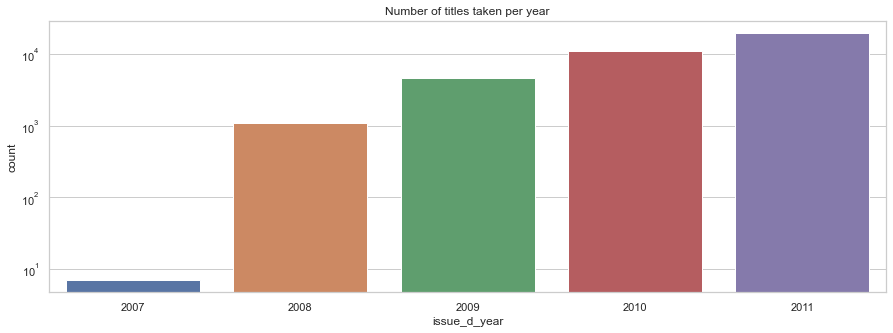

In [73]:
# Plotting the number of loans taken on the basis of the year
plt.figure(figsize=(15, 5))
sns.countplot(x='issue_d_year', data=loan)
plt.title('Number of titles taken per year')
plt.yscale('log')
plt.show()

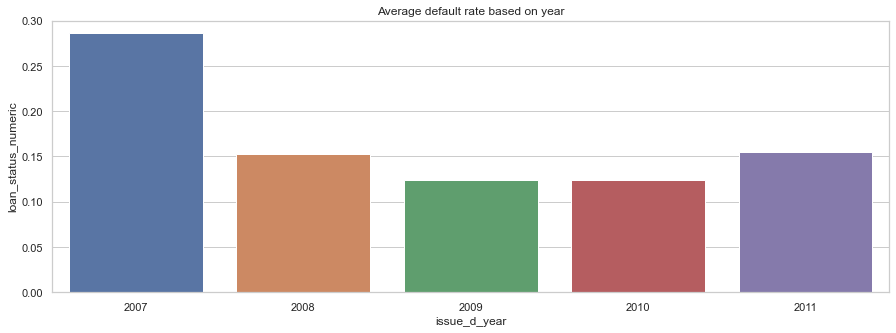

In [74]:
# Plotting the average default rate for each year
plt.figure(figsize=(15, 5))
sns.barplot(x='issue_d_year', y='loan_status_numeric', data=loan, ci=None)
plt.title('Average default rate based on year')
plt.show()

- __The number of loans has been on a steady increase__
- __In 2011 the default rate increases, inspite of seeing a downward trend from 2008 to 2010__

#### 12. addr_state
_Description_: The state provided by the borrower in the loan application

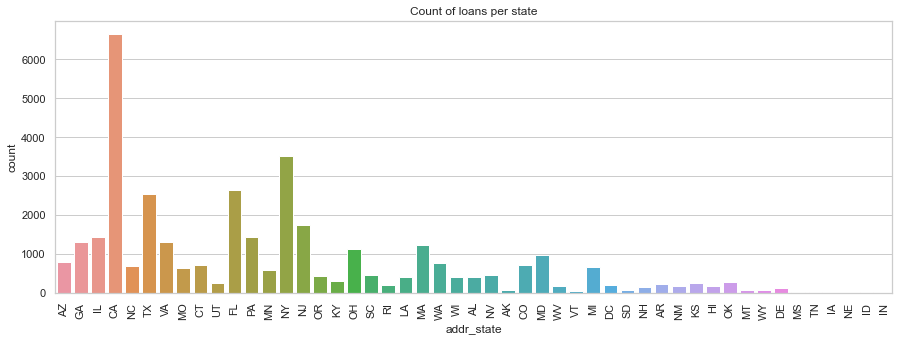

In [75]:
# Plotting the count of loans given for each state
plt.figure(figsize=(15, 5))
sns.countplot(x='addr_state', data=loan)
plt.title('Count of loans per state')
plt.xticks(rotation=90)
plt.show()

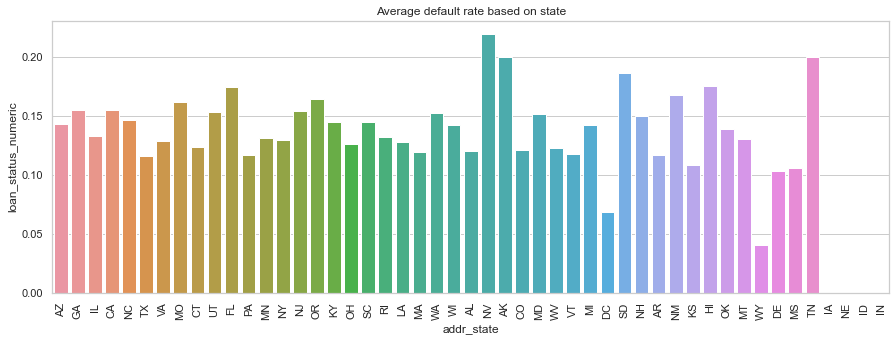

In [76]:
# Plotting the average default rate for each state
plt.figure(figsize=(15, 5))
sns.barplot(x='addr_state', y='loan_status_numeric', data=loan, ci=None)
plt.title('Average default rate based on state')
plt.xticks(rotation=90)
plt.show()

In [77]:
# Using plotly.express.choropleth to create a better visualization
col_dist = pd.DataFrame(loan.groupby('addr_state')['loan_status_numeric'].mean().reset_index())
default_ratio_map = px.choropleth(col_dist, locations = 'addr_state',
                           color = 'loan_status_numeric', hover_name = 'addr_state', scope = 'usa', locationmode="USA-states")
default_ratio_map.show()

- __The state of Nevada has the highest default rate, followed by Alaska and Tennessee__
- __However based on ratio, the variable state does not have a significant impact on default rate__

#### 13. int_rate
_Description_: Interest Rate on the loan

In [78]:
loan['int_rate'].describe()

count   36737.00
mean       11.98
std         3.70
min         5.42
25%         8.94
50%        11.83
75%        14.46
max        24.40
Name: int_rate, dtype: float64

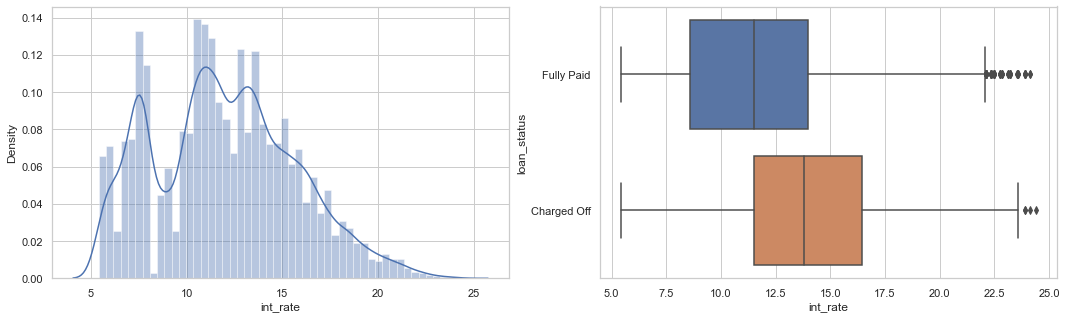

In [79]:
plt.figure(figsize=(18, 5))
sns.set_theme(style= 'whitegrid')
plt.subplot(1, 2, 1)
sns.distplot(loan['int_rate'])
plt.subplot(1, 2, 2)
sns.boxplot(data=loan, x='int_rate', y='loan_status')
plt.show()

In [80]:
loan.groupby('loan_status')['int_rate'].describe()

count  mean  std  min   25%   50%   75%   max
loan_status                                                 
Charged Off  5203.00 13.93 3.66 5.42 11.49 13.79 16.45 24.40
Fully Paid  31534.00 11.66 3.61 5.42  8.59 11.49 13.99 24.11

In [81]:
# Creating a int_rate_bin variable
loan['int_rate_bin'] = round(loan['int_rate'])

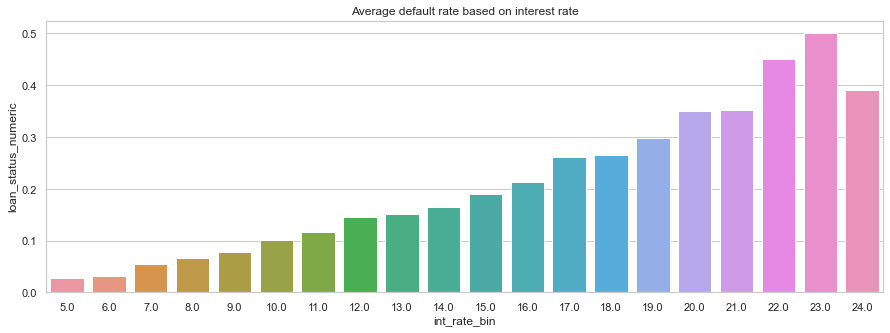

In [82]:
# Plotting the average default rate across the interest rate bins
plt.figure(figsize=(15, 5))
sns.barplot(x='int_rate_bin', y='loan_status_numeric', data=loan, ci=None)
plt.title('Average default rate based on interest rate')
plt.show()

- __The interest rate ranges from 5.42% to 24.40%__
- __The average interest rate is 11.83%__
- __As the interest rate increases, the default rate increases__

#### 14. installment
_Description_: The monthly payment owed by the borrower if the loan originates.

In [83]:
loan['installment'].describe(percentiles=[.01, .05, .25, .5, .70, .75, .9, .95, .99])

count   36737.00
mean      324.99
std       208.84
min        16.08
1%         39.29
5%         73.28
25%       167.73
50%       280.28
70%       389.30
75%       429.45
90%       622.66
95%       763.37
99%       933.11
max      1305.19
Name: installment, dtype: float64

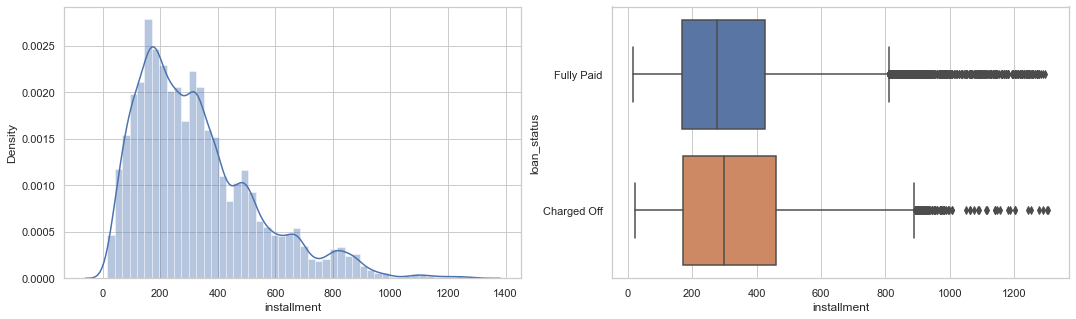

In [84]:
plt.figure(figsize=(18, 5))
sns.set_theme(style= 'whitegrid')
plt.subplot(1, 2, 1)
sns.distplot(loan['installment'])
plt.subplot(1, 2, 2)
sns.boxplot(data=loan, x='installment', y='loan_status')
plt.show()

In [85]:
loan.groupby('loan_status')['installment'].describe()

count   mean    std   min    25%    50%    75%     max
loan_status                                                          
Charged Off  5203.00 339.56 215.83 22.79 172.38 297.53 460.10 1305.19
Fully Paid  31534.00 322.59 207.57 16.08 167.08 278.15 424.55 1295.21

In [86]:
loan['installment_bin'] = pd.cut(loan['installment'], 
                                 [x for x in range(0, 1500, 200)], labels=[f'{x}-{x+2}' for x in range(0, 14, 2)])

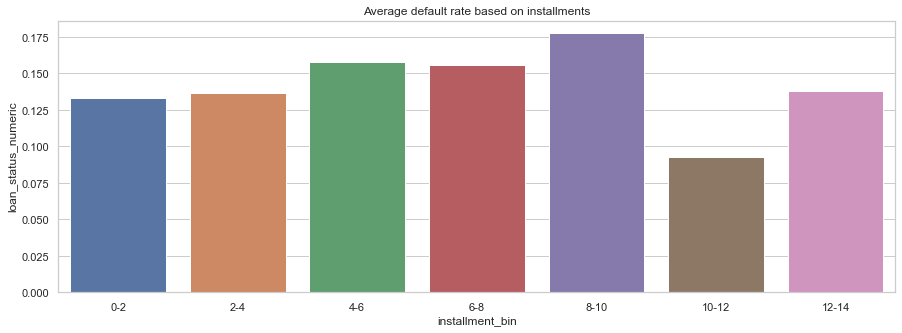

In [87]:
plt.figure(figsize=(15, 5))
sns.barplot(x='installment_bin', y='loan_status_numeric', data=loan, ci=None)
plt.title('Average default rate based on installments')
plt.show()

- __Charged Off loans on average have high installments__

#### 15. dti
_Description_: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [88]:
loan['dti'].describe()

count   36737.00
mean       13.34
std         6.65
min         0.00
25%         8.22
50%        13.43
75%        18.59
max        29.99
Name: dti, dtype: float64

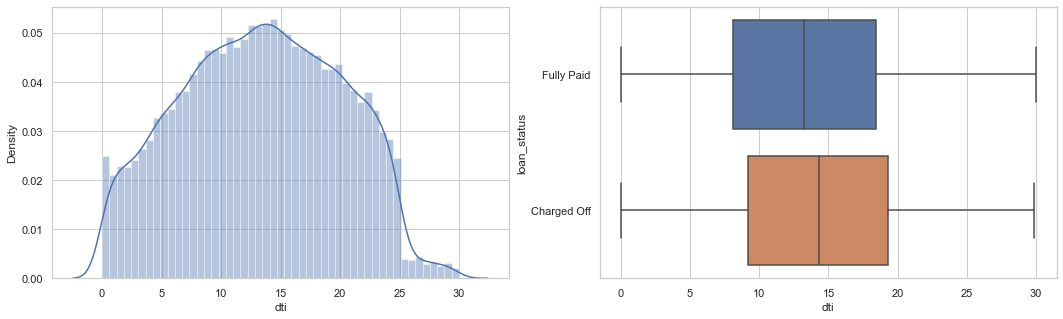

In [89]:
# Plotting the distribution of dti
plt.figure(figsize=(18, 5))
sns.set_theme(style= 'whitegrid')
plt.subplot(1, 2, 1)
sns.distplot(loan['dti'])
plt.subplot(1, 2, 2)
sns.boxplot(data=loan, x='dti', y='loan_status')
plt.show()

In [90]:
loan.groupby('loan_status')['dti'].describe()

count  mean  std  min  25%   50%   75%   max
loan_status                                                
Charged Off  5203.00 14.05 6.55 0.00 9.18 14.35 19.29 29.85
Fully Paid  31534.00 13.22 6.66 0.00 8.07 13.26 18.45 29.99

In [91]:
# Creating a dti_bin variable for plotting
loan['dti_bin'] = pd.cut(loan['dti'],
                         [x for x in range(0, 31, 5)], labels=[f'{x}-{x+5}' for x in range(0, 30, 5)])

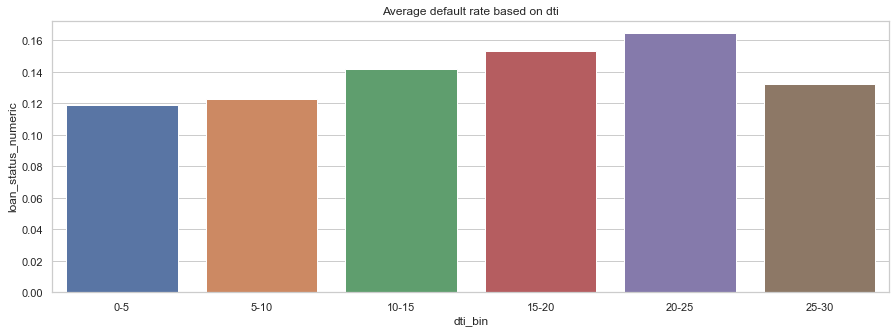

In [92]:
# Plotting the average default rate for dti
plt.figure(figsize=(15, 5))
sns.barplot(x='dti_bin', y='loan_status_numeric', data=loan, ci=None)
plt.title('Average default rate based on dti')
plt.show()

- As the dti increases the chance of the loan being defaulted on increase

#### 16. delinq_2yrs
_Description_: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [93]:
loan['delinq_2yrs'].value_counts()

0     32755
1      3058
2       633
3       197
4        55
5        21
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

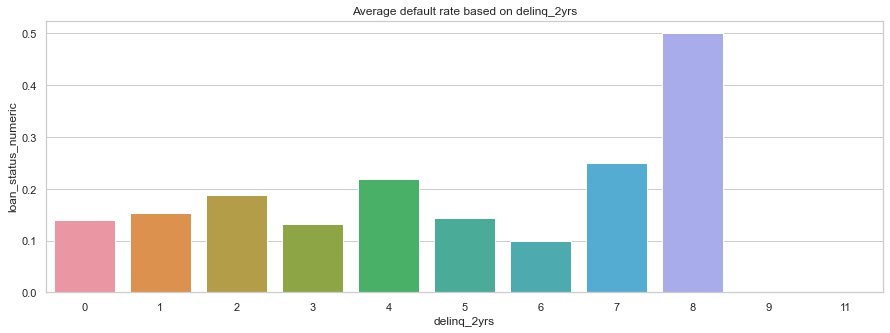

In [94]:
# Plotting average default rate against delinq_2yrs
plt.figure(figsize=(15, 5))
sns.barplot(x='delinq_2yrs', y='loan_status_numeric', data=loan, ci=None)
plt.title('Average default rate based on delinq_2yrs')
plt.show()

- __The chance of default greatly incereases, if the value for delinq_2yrs is greater then 1__

#### 17. inq_last_6mths
_Description_: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [95]:
loan['inq_last_6mths'].value_counts()

0    17835
1    10158
2     5388
3     2827
4      292
5      136
6       57
7       32
8       12
Name: inq_last_6mths, dtype: int64

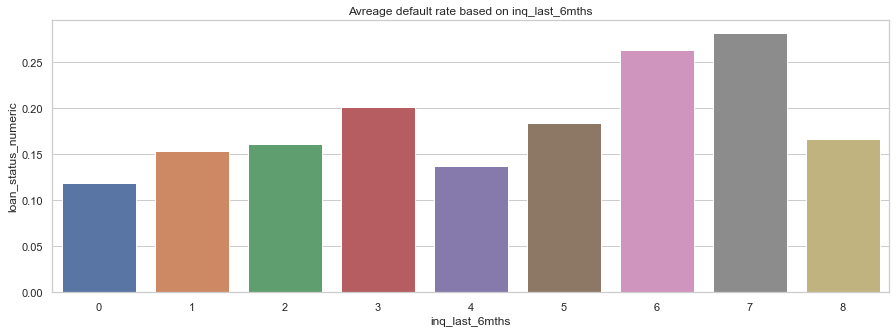

In [96]:
# Plotting average rate of default for inq_last_6mths
plt.figure(figsize=(15, 5))
plt.title('Avreage default rate based on inq_last_6mths')
sns.barplot(x='inq_last_6mths', y='loan_status_numeric', data=loan, ci=None)
plt.show()

- __As the number of inquiries increases the chance of deafulting on the loan also increases__

#### 18. open_acc
_Description_: The number of open credit lines in the borrower's credit file.

In [97]:
loan['open_acc'].describe()

count   36737.00
mean        9.31
std         4.38
min         2.00
25%         6.00
50%         9.00
75%        12.00
max        44.00
Name: open_acc, dtype: float64

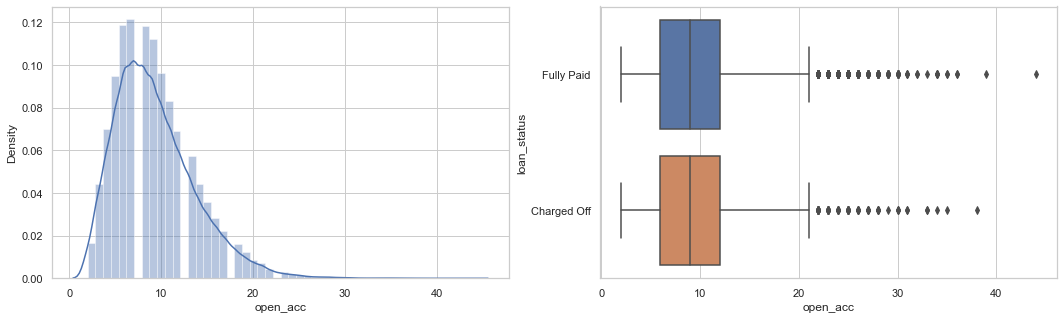

In [98]:
# Plotting the distribution for open_acc
plt.figure(figsize=(18, 5))
sns.set_theme(style= 'whitegrid')
plt.subplot(1, 2, 1)
sns.distplot(loan['open_acc'])
plt.subplot(1, 2, 2)
sns.boxplot(data=loan, x='open_acc', y='loan_status')
plt.show()

In [99]:
loan.groupby('loan_status')['open_acc'].describe()

count  mean  std  min  25%  50%   75%   max
loan_status                                               
Charged Off  5203.00  9.26 4.51 2.00 6.00 9.00 12.00 38.00
Fully Paid  31534.00  9.31 4.35 2.00 6.00 9.00 12.00 44.00

- __Based on the median value, the borrowers have 9 open credit lines__
- __For charged off and fully paid, no significant difference can be seen__

#### 19. pub_rec
_Description_: Number of derogatory public records

In [100]:
loan['pub_rec'].value_counts()

0    34815
1     1868
2       45
3        7
4        2
Name: pub_rec, dtype: int64

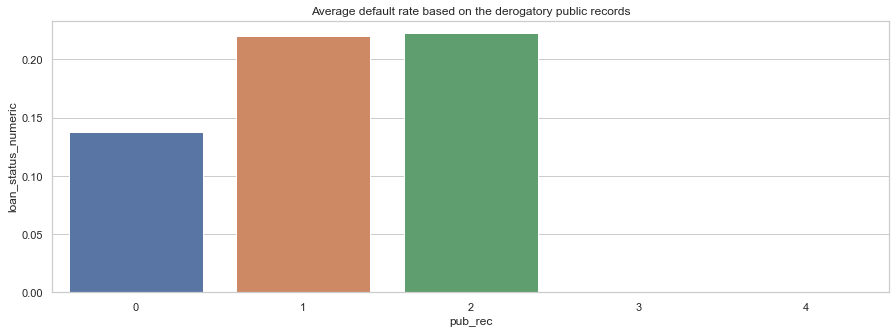

In [101]:
# Plotting the average default rate for number of deogatory public records
plt.figure(figsize=(15, 5))
sns.barplot(x='pub_rec', y='loan_status_numeric', data=loan, ci=None)
plt.title('Average default rate based on the derogatory public records')
plt.show()

- __Having even 1 derogatory public record, increases the default rate__

#### 20. pub_rec_bankruptcies
_Description_: Number of public record bankruptcies

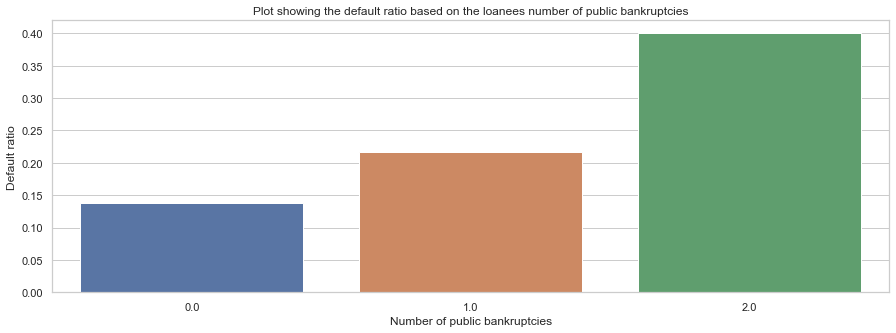

In [102]:
plt.figure(figsize=[15, 5])
sns.barplot(x='pub_rec_bankruptcies', y='loan_status_numeric', data=loan, ci=None)
plt.title('Plot showing the default ratio based on the loanees number of public bankruptcies')
plt.xlabel('Number of public bankruptcies')
plt.ylabel('Default ratio')
plt.show()

- __The chances of default are higher for applicants which have a prior record of bankrupties__

#### Plotting loan_amnt against annual_inc

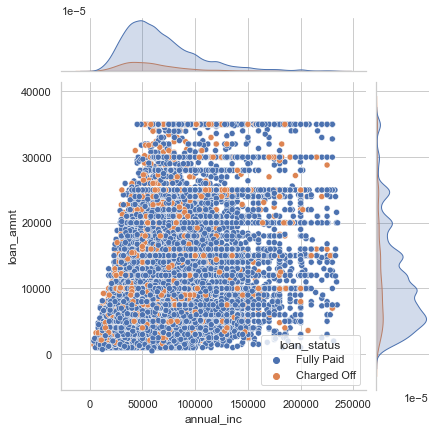

In [103]:
sns.jointplot(x='annual_inc', y='loan_amnt', hue='loan_status', data=loan[loan['annual_inc'] < 235000])
plt.show()

#### Plotting loan_amnt against verification_status against loan_status

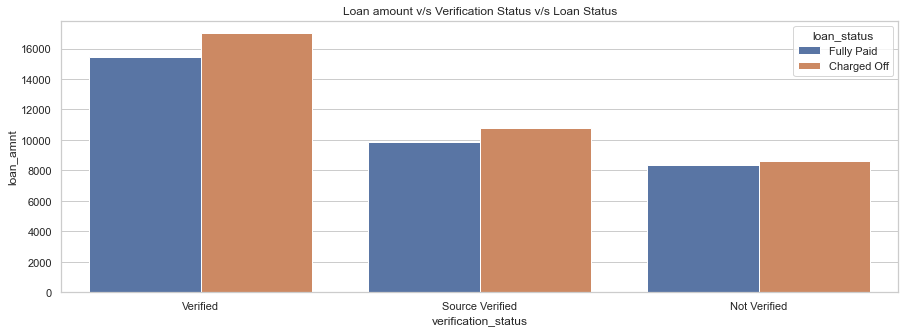

In [104]:
plt.figure(figsize=(15, 5))
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=loan, ci=None)
plt.title('Loan amount v/s Verification Status v/s Loan Status')
plt.show()

#### The loan amount for loans having a 'Verified' status is quite high, this would suggest that Lending Club verifies the income source for loan applied for larger amounts

#### Plotting Interest rate against grade

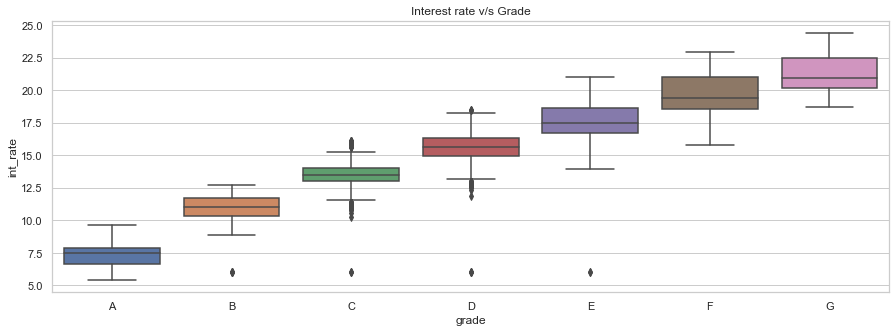

In [105]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='grade', y='int_rate', data=loan, order=sorted(list(loan.grade.unique())))
plt.title('Interest rate v/s Grade')
plt.show()

#### The interest rate can been seen to be on a upward trend as the grade decreases

#### Plotting interest rate against subgrade

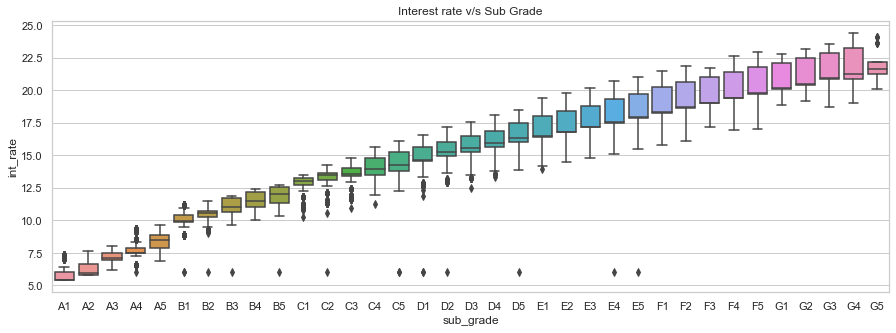

In [106]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='sub_grade', y='int_rate', data=loan, order=sorted(list(loan.sub_grade.unique())))
plt.title('Interest rate v/s Sub Grade')
plt.show()

#### Similar to grade, as the sub-grade deteriorates the interest rate increases

#### Plotting interest rate against term

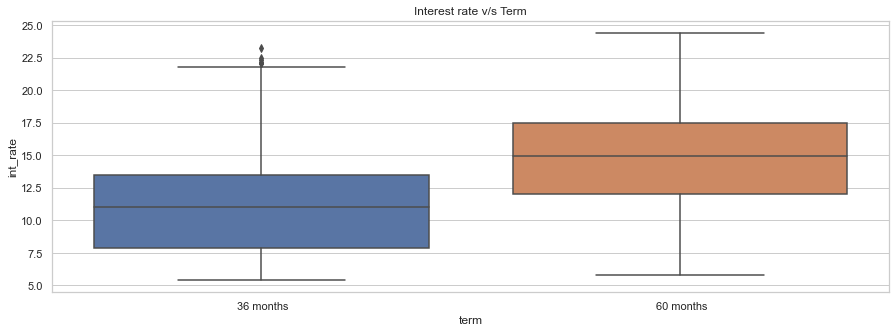

In [107]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='term', y='int_rate', data=loan)
plt.title('Interest rate v/s Term')
plt.show()

#### The interest rate is higher for loans with a term of 60 months

#### Plotting interest rate against loan status

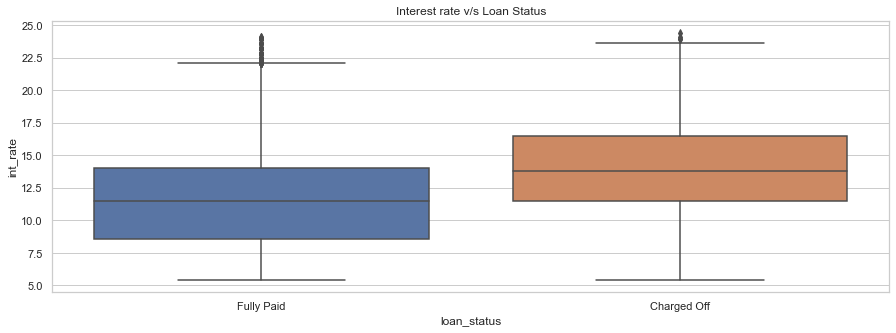

In [108]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='loan_status', y='int_rate', data=loan)
plt.title('Interest rate v/s Loan Status')
plt.show()

#### The average interest rate of charged off loans is higher

#### Plotting loan amount against grade and term

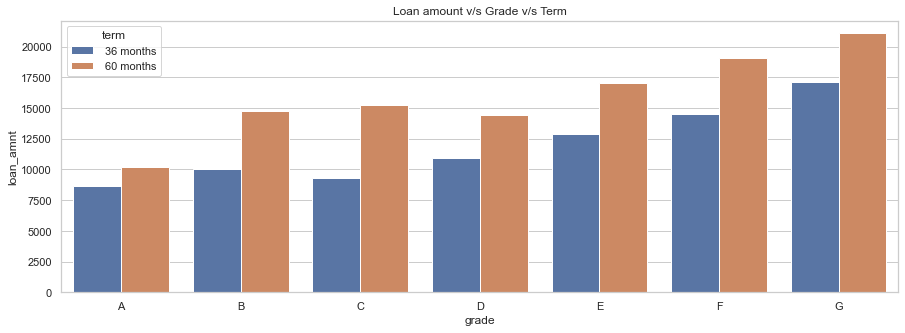

In [109]:
plt.figure(figsize=(15, 5))
sns.barplot(x='grade', y='loan_amnt', hue='term', data=loan, order=sorted(list(loan.grade.unique())), ci=None)
plt.title('Loan amount v/s Grade v/s Term')
plt.show()

#### Plotting loan amount against term against loan status

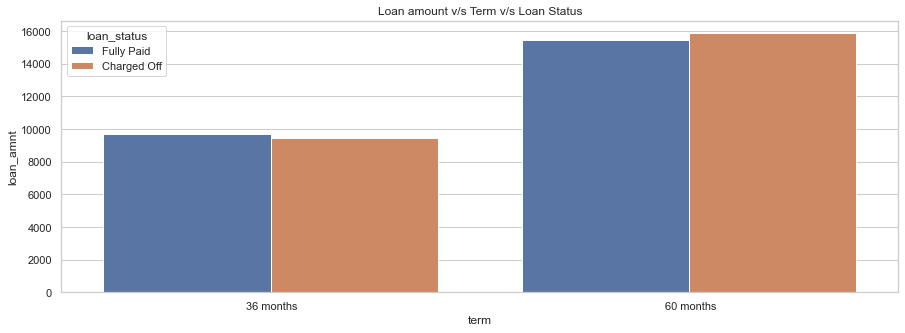

In [110]:
plt.figure(figsize=(15, 5))
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=loan, ci=None)
plt.title('Loan amount v/s Term v/s Loan Status')
plt.show()

#### For loans given over a term of 60 months there seems to be slightly more cases of the borrower defaulting.

#### Plotting Loan amount against Address State against Loan Status

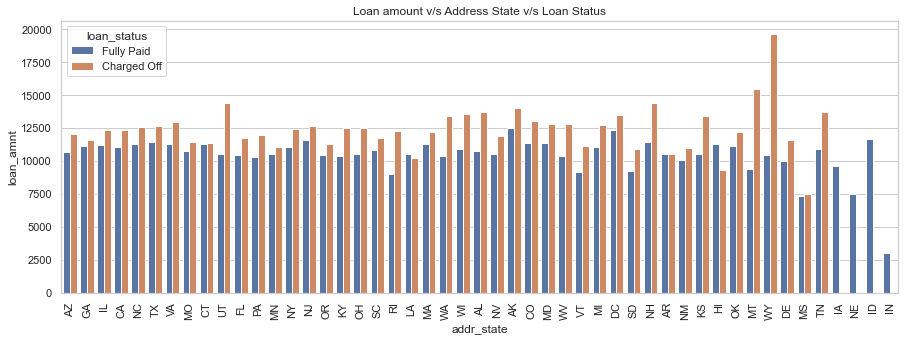

In [111]:
plt.figure(figsize=(15, 5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status', data=loan, ci=None)
plt.title('Loan amount v/s Address State v/s Loan Status')
plt.xticks(rotation=90)
plt.show()

#### From the above graph, we can see that the state of Wyoming (WY) has the highest number of 'Charged Off' loans followed by Montana (MT)